# 🎯 Regularized Regression - Ridge, Lasso & ElasticNet

**Module 01: Regression Algorithms (Supervised Learning)**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Why Regularization?** - The overfitting problem in linear regression
2. **Ridge Regression (L2)** - Shrinks coefficients, prevents overfitting
3. **Lasso Regression (L1)** - Feature selection through sparsity
4. **ElasticNet** - Best of both Ridge and Lasso
5. **Hyperparameter Tuning** - Finding optimal alpha values
6. **Production Deployment** - When to use which regularization technique

## 📚 Section 1: Theoretical Foundation

### The Overfitting Problem in Linear Regression

**Standard Linear Regression** minimizes:
```
Loss = MSE = (1/n) Σ(yᵢ - ŷᵢ)²
```

**Problem:** With many features, the model can fit training data perfectly but fail on new data (overfitting).

**Solution:** Add a **penalty term** to discourage large coefficients.

---

### 🔵 Ridge Regression (L2 Regularization)

**Loss Function:**
```
Loss = MSE + α × Σβⱼ²
```

**Key Characteristics:**
- Adds **squared magnitude** of coefficients as penalty
- **Shrinks** coefficients toward zero (but never exactly zero)
- Works well when **all features are relevant**
- Handles **multicollinearity** (correlated features) well
- Parameter **α (alpha)**: Controls regularization strength
  - α = 0 → Standard Linear Regression
  - α → ∞ → All coefficients → 0

**Use Case:** When you have many correlated features and want to keep all of them.

---

### 🔴 Lasso Regression (L1 Regularization)

**Loss Function:**
```
Loss = MSE + α × Σ|βⱼ|
```

**Key Characteristics:**
- Adds **absolute magnitude** of coefficients as penalty
- **Forces some coefficients to exactly zero** (feature selection)
- Creates **sparse models** (fewer features)
- Works well when **only some features are important**
- Can struggle with correlated features (picks one randomly)

**Use Case:** When you have many features and want automatic feature selection.

---

### 🟣 ElasticNet (L1 + L2 Combined)

**Loss Function:**
```
Loss = MSE + α × [l1_ratio × Σ|βⱼ| + (1 - l1_ratio) × Σβⱼ²]
```

**Key Characteristics:**
- Combines both L1 and L2 penalties
- Two hyperparameters: **α** (strength) and **l1_ratio** (balance)
  - l1_ratio = 0 → Pure Ridge
  - l1_ratio = 1 → Pure Lasso
  - l1_ratio = 0.5 → Equal mix
- Handles correlated features better than Lasso
- Still achieves feature selection like Lasso

**Use Case:** When you have many correlated features AND want feature selection.

---

### 📊 Visual Comparison

| **Method** | **Penalty** | **Feature Selection** | **Multicollinearity** | **Best For** |
|------------|-------------|----------------------|----------------------|--------------|
| **Linear Regression** | None | No | Poor | Simple, interpretable models |
| **Ridge (L2)** | Sum of squares | No | Excellent | Many correlated features |
| **Lasso (L1)** | Sum of absolute | Yes (Sparse) | Moderate | Automatic feature selection |
| **ElasticNet** | L1 + L2 | Yes (Sparse) | Excellent | Correlated features + selection |

## 🔧 Section 2: Setup & Dataset Loading

In [5]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [7]:
# Load California Housing Dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print("📊 California Housing Dataset Loaded")
print(f"Shape: {df.shape}")
print(f"Features: {list(housing.feature_names)}")
print(f"\nTarget: Median House Value (in $100,000s)")
print("\n" + "="*70)
print(df.head())

📊 California Housing Dataset Loaded
Shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: Median House Value (in $100,000s)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


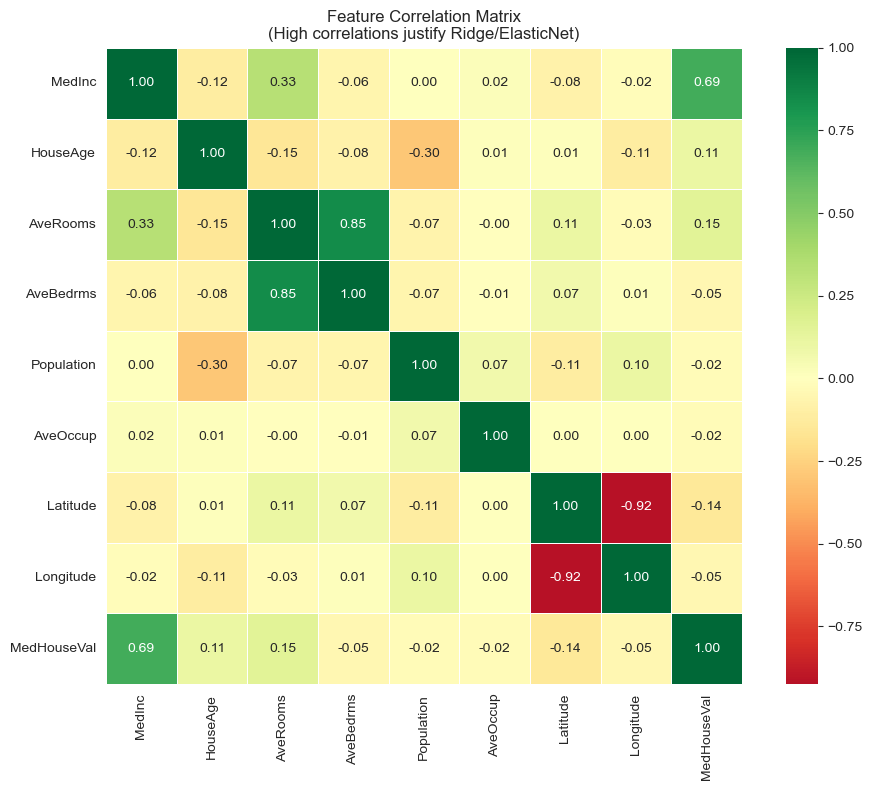


🔗 Highly Correlated Features (|correlation| > 0.5):
  MedInc ↔ MedHouseVal: 0.688
  AveRooms ↔ AveBedrms: 0.848
  Latitude ↔ Longitude: -0.925


In [9]:
# Quick EDA - Check for multicollinearity
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', 
            square=True, linewidths=0.5, center=0)
plt.title('Feature Correlation Matrix\n(High correlations justify Ridge/ElasticNet)')
plt.tight_layout()
plt.show()

# Identify highly correlated feature pairs
print("\n🔗 Highly Correlated Features (|correlation| > 0.5):")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

for feat1, feat2, corr in corr_pairs:
    print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

In [11]:
# Split features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✂️ Data Split:")
print(f"Training: {X_train.shape[0]} samples | Testing: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")


✂️ Data Split:
Training: 16512 samples | Testing: 4128 samples
Features: 8


In [13]:
# Feature Scaling (CRITICAL for regularization!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n⚖️ Features Standardized (mean=0, std=1)")
print("✅ Ready for regularized regression!")


⚖️ Features Standardized (mean=0, std=1)
✅ Ready for regularized regression!


## 🧪 Section 3: Model Training & Comparison

### 3.1 Baseline: Standard Linear Regression

In [17]:
# Train standard linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("📊 Linear Regression (Baseline - No Regularization)")
print(f"R² Score: {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"\nCoefficients: {lr.coef_}")

📊 Linear Regression (Baseline - No Regularization)
R² Score: 0.5758
RMSE: 0.7456

Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


### 3.2 Ridge Regression (L2 Regularization)

In [20]:
# Train Ridge with default alpha=1.0
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("📊 Ridge Regression (L2 Regularization, α=1.0)")
print(f"R² Score: {ridge_r2:.4f}")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"\nCoefficients: {ridge.coef_}")

📊 Ridge Regression (L2 Regularization, α=1.0)
R² Score: 0.5758
RMSE: 0.7456

Coefficients: [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]


### 3.3 Lasso Regression (L1 Regularization)

In [23]:
# Train Lasso with default alpha=1.0
lasso = Lasso(alpha=1.0, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("📊 Lasso Regression (L1 Regularization, α=1.0)")
print(f"R² Score: {lasso_r2:.4f}")
print(f"RMSE: {lasso_rmse:.4f}")
print(f"\nCoefficients: {lasso.coef_}")
print(f"Features zeroed out: {np.sum(lasso.coef_ == 0)}/{len(lasso.coef_)}")

📊 Lasso Regression (L1 Regularization, α=1.0)
R² Score: -0.0002
RMSE: 1.1449

Coefficients: [ 0.  0.  0. -0. -0. -0. -0. -0.]
Features zeroed out: 8/8


### 3.4 ElasticNet (L1 + L2 Combined)

In [26]:
# Train ElasticNet with default alpha=1.0, l1_ratio=0.5
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42, max_iter=10000)
elasticnet.fit(X_train_scaled, y_train)
y_pred_elastic = elasticnet.predict(X_test_scaled)

# Evaluate
elastic_r2 = r2_score(y_test, y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

print("📊 ElasticNet (L1 + L2, α=1.0, l1_ratio=0.5)")
print(f"R² Score: {elastic_r2:.4f}")
print(f"RMSE: {elastic_rmse:.4f}")
print(f"\nCoefficients: {elasticnet.coef_}")
print(f"Features zeroed out: {np.sum(elasticnet.coef_ == 0)}/{len(elasticnet.coef_)}")

📊 ElasticNet (L1 + L2, α=1.0, l1_ratio=0.5)
R² Score: 0.2031
RMSE: 1.0219

Coefficients: [ 0.19901304  0.          0.         -0.         -0.         -0.
 -0.         -0.        ]
Features zeroed out: 7/8


### 3.5 Coefficient Comparison Across Models

In [29]:
# Create comparison DataFrame
coef_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'Linear Reg': lr.coef_,
    'Ridge (α=1)': ridge.coef_,
    'Lasso (α=1)': lasso.coef_,
    'ElasticNet (α=1)': elasticnet.coef_
})

print("\n📊 Coefficient Comparison:")
print(coef_comparison.to_string(index=False))


📊 Coefficient Comparison:
   Feature  Linear Reg  Ridge (α=1)  Lasso (α=1)  ElasticNet (α=1)
    MedInc    0.854383     0.854327          0.0          0.199013
  HouseAge    0.122546     0.122624          0.0          0.000000
  AveRooms   -0.294410    -0.294210          0.0          0.000000
 AveBedrms    0.339259     0.339008         -0.0         -0.000000
Population   -0.002308    -0.002282         -0.0         -0.000000
  AveOccup   -0.040829    -0.040833         -0.0         -0.000000
  Latitude   -0.896929    -0.896168         -0.0         -0.000000
 Longitude   -0.869842    -0.869071         -0.0         -0.000000


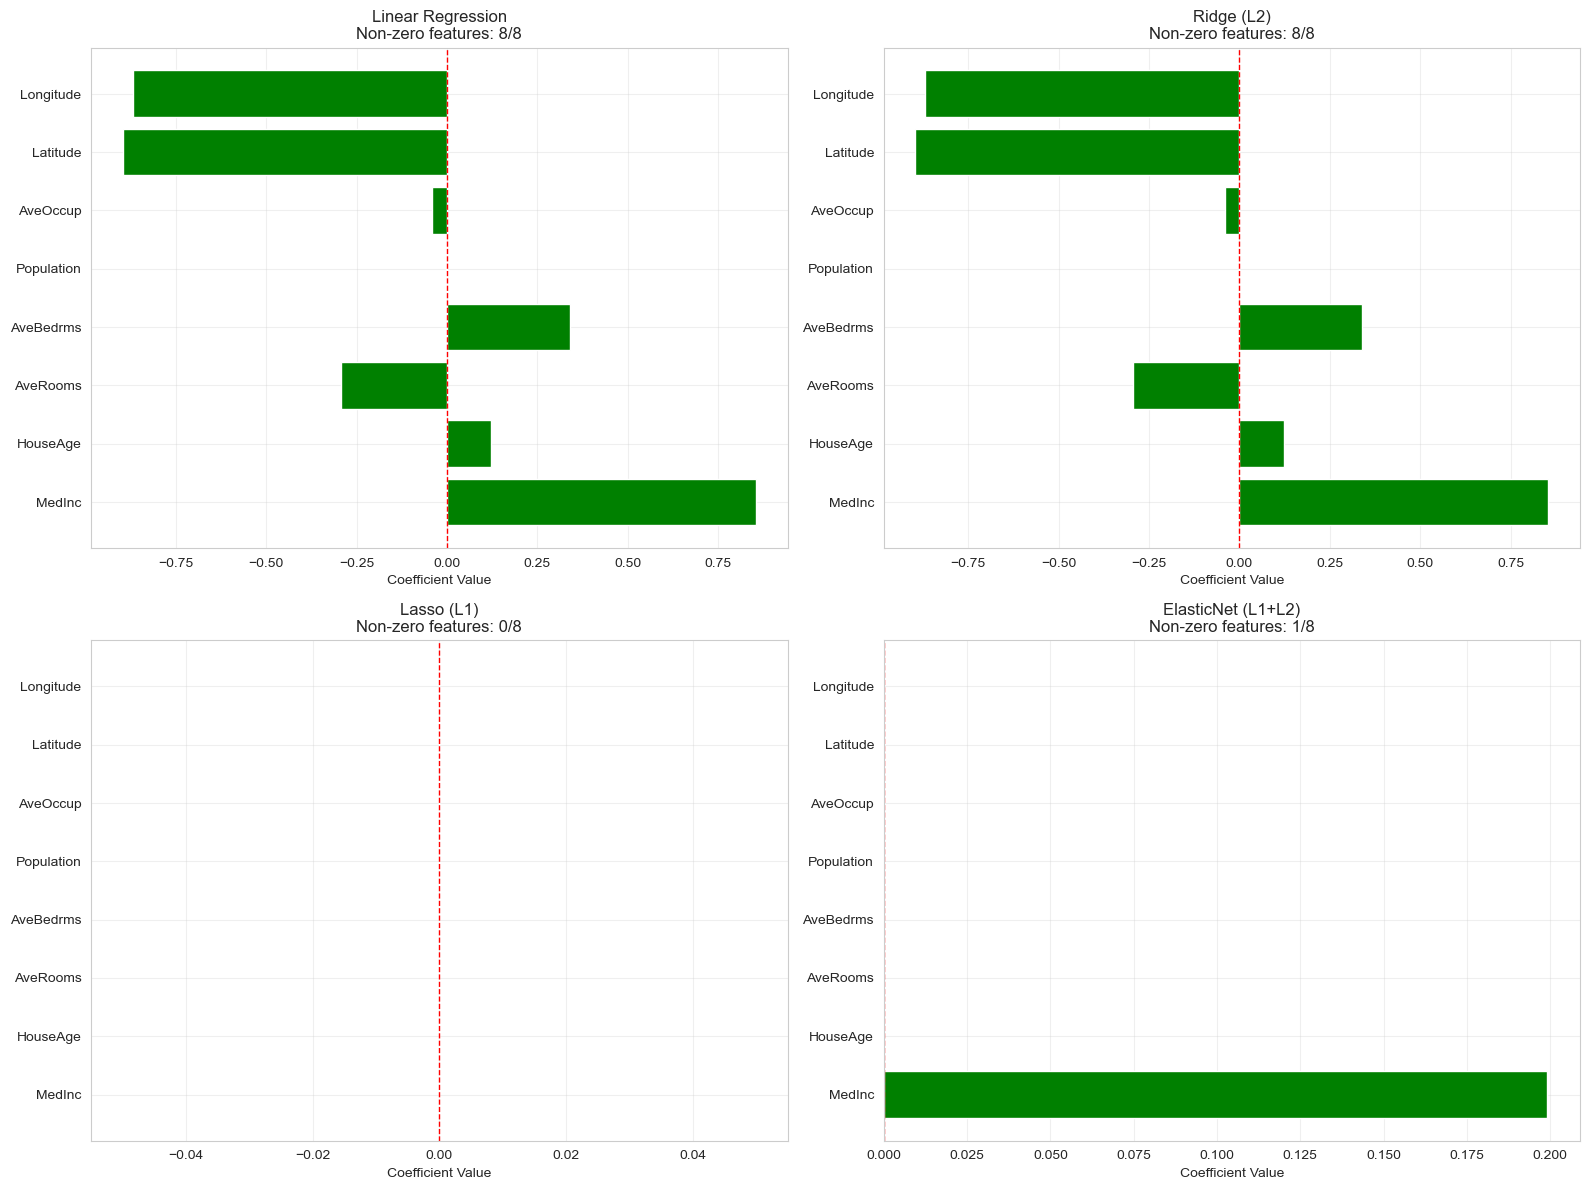

In [31]:
# Visualize coefficient comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = [
    ('Linear Regression', lr.coef_),
    ('Ridge (L2)', ridge.coef_),
    ('Lasso (L1)', lasso.coef_),
    ('ElasticNet (L1+L2)', elasticnet.coef_)
]

for idx, (name, coefs) in enumerate(models):
    ax = axes[idx // 2, idx % 2]
    colors = ['green' if c != 0 else 'gray' for c in coefs]
    ax.barh(X_train.columns, coefs, color=colors)
    ax.set_xlabel('Coefficient Value')
    ax.set_title(f'{name}\nNon-zero features: {np.sum(coefs != 0)}/{len(coefs)}')
    ax.axvline(x=0, color='red', linestyle='--', linewidth=1)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

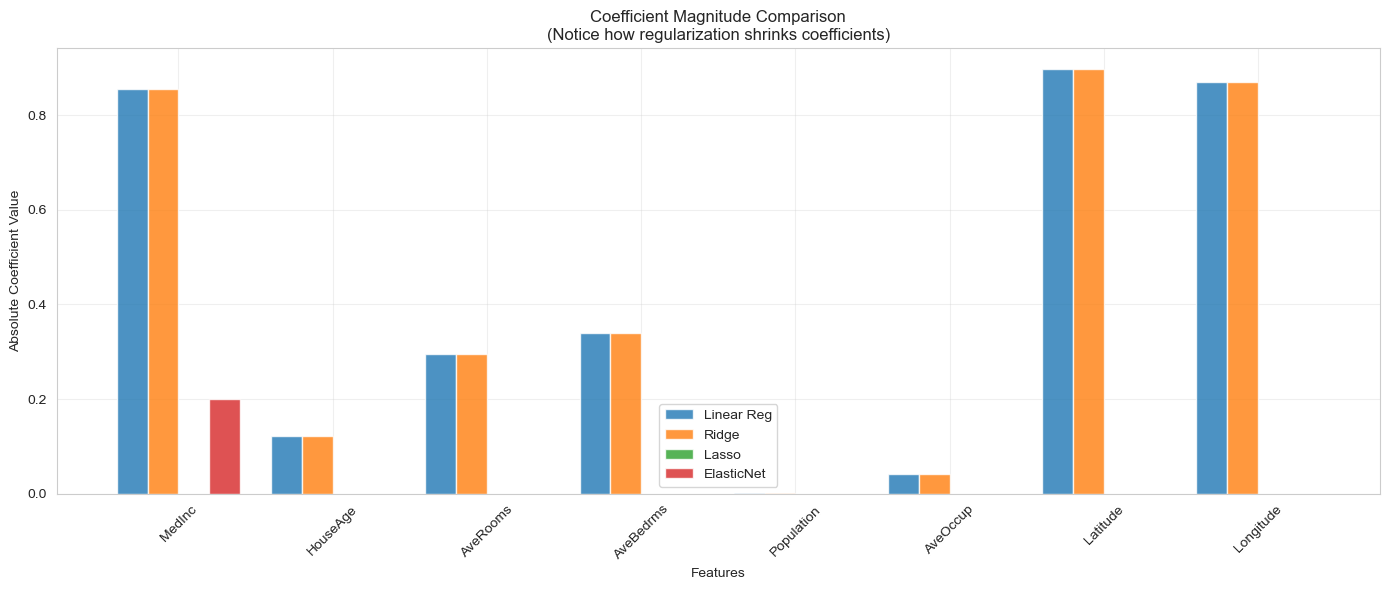

In [33]:
# Side-by-side magnitude comparison
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(X_train.columns))
width = 0.2

ax.bar(x - 1.5*width, np.abs(lr.coef_), width, label='Linear Reg', alpha=0.8)
ax.bar(x - 0.5*width, np.abs(ridge.coef_), width, label='Ridge', alpha=0.8)
ax.bar(x + 0.5*width, np.abs(lasso.coef_), width, label='Lasso', alpha=0.8)
ax.bar(x + 1.5*width, np.abs(elasticnet.coef_), width, label='ElasticNet', alpha=0.8)

ax.set_xlabel('Features')
ax.set_ylabel('Absolute Coefficient Value')
ax.set_title('Coefficient Magnitude Comparison\n(Notice how regularization shrinks coefficients)')
ax.set_xticks(x)
ax.set_xticklabels(X_train.columns, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.6 Performance Comparison

In [36]:
# Create performance summary
performance_df = pd.DataFrame({
    'Model': ['Linear Reg', 'Ridge (α=1)', 'Lasso (α=1)', 'ElasticNet (α=1)'],
    'R² Score': [lr_r2, ridge_r2, lasso_r2, elastic_r2],
    'RMSE': [lr_rmse, ridge_rmse, lasso_rmse, elastic_rmse],
    'Non-zero Features': [
        len(lr.coef_),
        np.sum(ridge.coef_ != 0),
        np.sum(lasso.coef_ != 0),
        np.sum(elasticnet.coef_ != 0)
    ]
})

print("\n📊 Model Performance Summary (α=1.0):")
print(performance_df.to_string(index=False))


📊 Model Performance Summary (α=1.0):
           Model  R² Score     RMSE  Non-zero Features
      Linear Reg  0.575788 0.745581                  8
     Ridge (α=1)  0.575816 0.745557                  8
     Lasso (α=1) -0.000219 1.144856                  0
ElasticNet (α=1)  0.203126 1.021876                  1


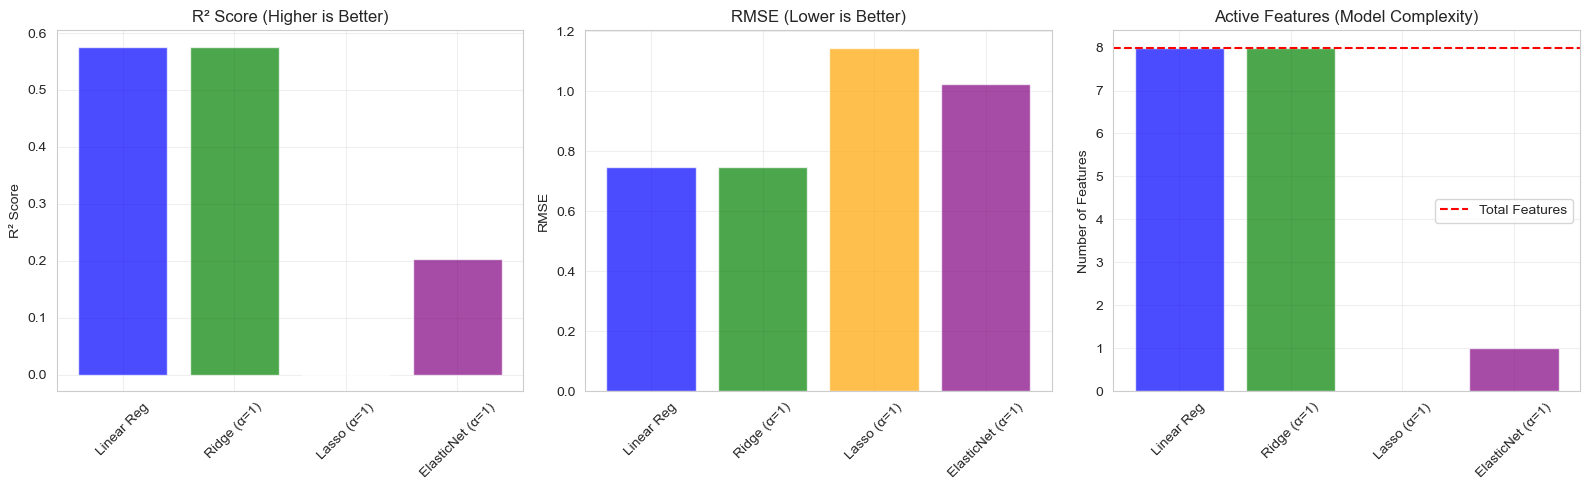

In [38]:
# Visualize performance
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# R² Score
axes[0].bar(performance_df['Model'], performance_df['R² Score'], 
            color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score (Higher is Better)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# RMSE
axes[1].bar(performance_df['Model'], performance_df['RMSE'], 
            color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Feature Count
axes[2].bar(performance_df['Model'], performance_df['Non-zero Features'], 
            color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
axes[2].set_ylabel('Number of Features')
axes[2].set_title('Active Features (Model Complexity)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].axhline(y=8, color='red', linestyle='--', label='Total Features')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 Section 4: Hyperparameter Tuning & Evaluation

### 4.1 Understanding Alpha (α) - The Regularization Strength

**Alpha controls the trade-off between:**
- Fitting the training data well (low α)
- Keeping coefficients small (high α)

In [42]:
# Test different alpha values
alphas = np.logspace(-3, 3, 50)  # 0.001 to 1000

ridge_scores = []
lasso_scores = []
elastic_scores = []

for alpha in alphas:
    # Ridge
    ridge_temp = Ridge(alpha=alpha, random_state=42)
    ridge_cv = cross_val_score(ridge_temp, X_train_scaled, y_train, cv=5, scoring='r2')
    ridge_scores.append(ridge_cv.mean())
    
    # Lasso
    lasso_temp = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_cv = cross_val_score(lasso_temp, X_train_scaled, y_train, cv=5, scoring='r2')
    lasso_scores.append(lasso_cv.mean())
    
    # ElasticNet
    elastic_temp = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42, max_iter=10000)
    elastic_cv = cross_val_score(elastic_temp, X_train_scaled, y_train, cv=5, scoring='r2')
    elastic_scores.append(elastic_cv.mean())

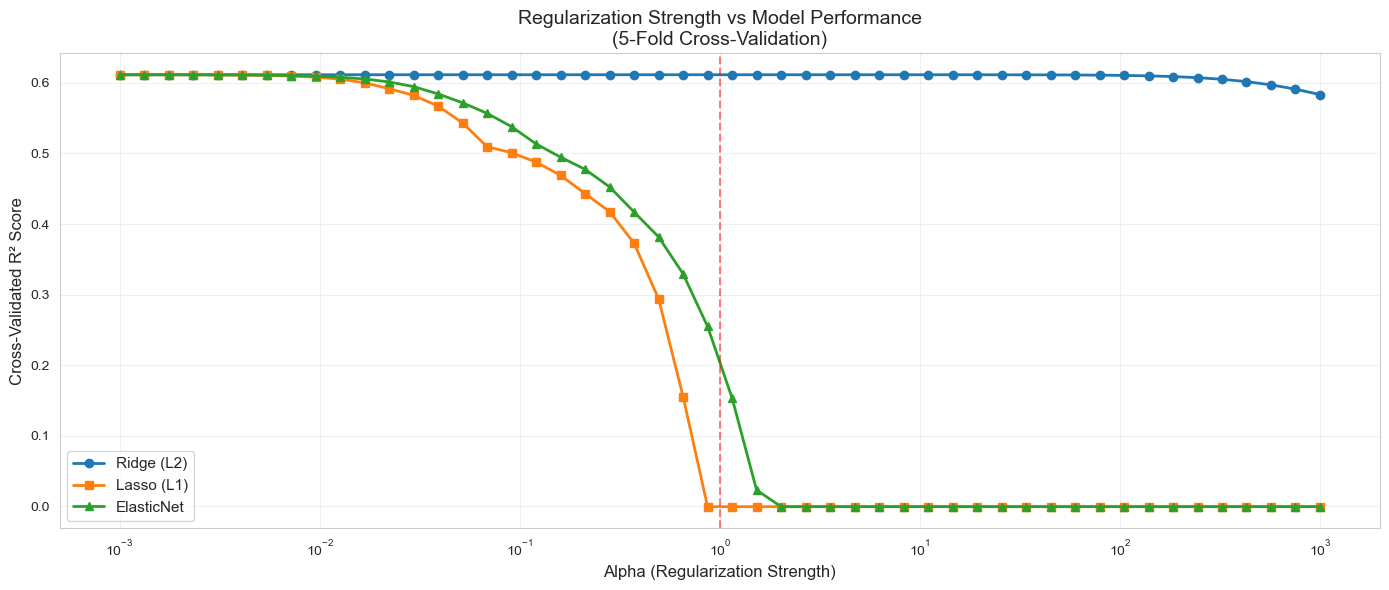


🎯 Optimal Alpha Values:
Ridge:      0.0010 (R² = 0.6115)
Lasso:      0.0010 (R² = 0.6115)
ElasticNet: 0.0010 (R² = 0.6115)


In [44]:
# Plot alpha vs R² score
plt.figure(figsize=(14, 6))

plt.plot(alphas, ridge_scores, label='Ridge (L2)', marker='o', linewidth=2)
plt.plot(alphas, lasso_scores, label='Lasso (L1)', marker='s', linewidth=2)
plt.plot(alphas, elastic_scores, label='ElasticNet', marker='^', linewidth=2)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Cross-Validated R² Score', fontsize=12)
plt.title('Regularization Strength vs Model Performance\n(5-Fold Cross-Validation)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axvline(x=1, color='red', linestyle='--', alpha=0.5, label='α=1 (default)')
plt.tight_layout()
plt.show()

# Find optimal alphas
optimal_ridge_alpha = alphas[np.argmax(ridge_scores)]
optimal_lasso_alpha = alphas[np.argmax(lasso_scores)]
optimal_elastic_alpha = alphas[np.argmax(elastic_scores)]

print("\n🎯 Optimal Alpha Values:")
print(f"Ridge:      {optimal_ridge_alpha:.4f} (R² = {max(ridge_scores):.4f})")
print(f"Lasso:      {optimal_lasso_alpha:.4f} (R² = {max(lasso_scores):.4f})")
print(f"ElasticNet: {optimal_elastic_alpha:.4f} (R² = {max(elastic_scores):.4f})")

### 4.2 Automatic Alpha Selection with CV

In [47]:
# Use built-in cross-validation for optimal alpha
ridge_cv = RidgeCV(alphas=alphas, cv=5)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5, random_state=42, max_iter=10000)

# Fit models
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elastic_cv.fit(X_train_scaled, y_train)

print("\n🔍 Automatically Selected Alpha Values:")
print(f"Ridge:      α = {ridge_cv.alpha_:.4f}")
print(f"Lasso:      α = {lasso_cv.alpha_:.4f}")
print(f"ElasticNet: α = {elastic_cv.alpha_:.4f}")


🔍 Automatically Selected Alpha Values:
Ridge:      α = 0.0010
Lasso:      α = 0.0010
ElasticNet: α = 0.0010


In [49]:
# Evaluate tuned models
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)
y_pred_elastic_cv = elastic_cv.predict(X_test_scaled)

tuned_performance = pd.DataFrame({
    'Model': ['Ridge (Tuned)', 'Lasso (Tuned)', 'ElasticNet (Tuned)'],
    'Optimal Alpha': [ridge_cv.alpha_, lasso_cv.alpha_, elastic_cv.alpha_],
    'R² Score': [
        r2_score(y_test, y_pred_ridge_cv),
        r2_score(y_test, y_pred_lasso_cv),
        r2_score(y_test, y_pred_elastic_cv)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),
        np.sqrt(mean_squared_error(y_test, y_pred_elastic_cv))
    ],
    'Non-zero Features': [
        np.sum(ridge_cv.coef_ != 0),
        np.sum(lasso_cv.coef_ != 0),
        np.sum(elastic_cv.coef_ != 0)
    ]
})

print("\n📊 Tuned Model Performance:")
print(tuned_performance.to_string(index=False))


📊 Tuned Model Performance:
             Model  Optimal Alpha  R² Score     RMSE  Non-zero Features
     Ridge (Tuned)          0.001  0.575788 0.745581                  8
     Lasso (Tuned)          0.001  0.576856 0.744642                  8
ElasticNet (Tuned)          0.001  0.576543 0.744917                  8


### 4.3 Feature Selection with Lasso

**Lasso's superpower:** Automatic feature selection by forcing coefficients to zero.

In [53]:
# Analyze Lasso feature selection
lasso_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_cv.coef_,
    'Selected': lasso_cv.coef_ != 0
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n🎯 Lasso Feature Selection Results:")
print(lasso_features.to_string(index=False))


🎯 Lasso Feature Selection Results:
   Feature  Coefficient  Selected
  Latitude    -0.885822      True
 Longitude    -0.858093      True
    MedInc     0.849140      True
 AveBedrms     0.326050      True
  AveRooms    -0.281273      True
  HouseAge     0.123346      True
  AveOccup    -0.039890      True
Population    -0.001062      True


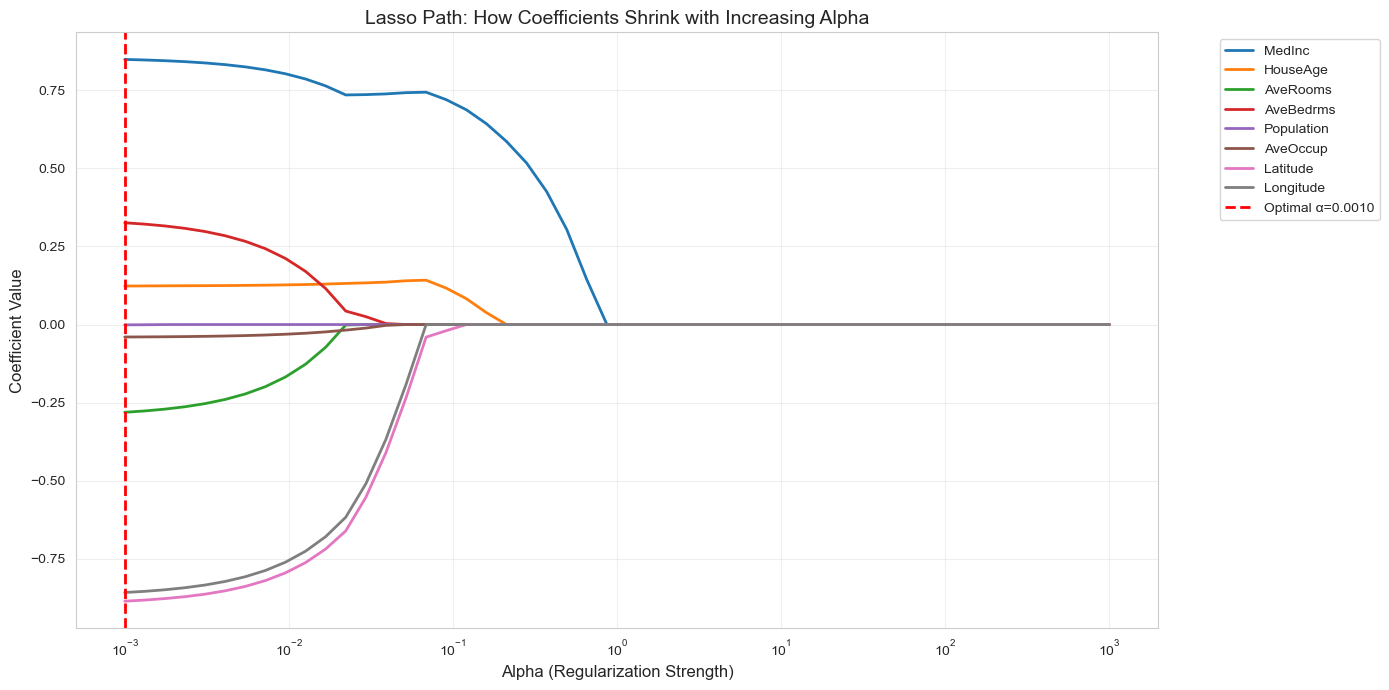

In [55]:
# Visualize Lasso path (coefficient evolution)
from sklearn.linear_model import lasso_path

alphas_path, coefs_path, _ = lasso_path(X_train_scaled, y_train, alphas=alphas)

plt.figure(figsize=(14, 7))
for i, feature in enumerate(X_train.columns):
    plt.plot(alphas_path, coefs_path[i, :], label=feature, linewidth=2)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Lasso Path: How Coefficients Shrink with Increasing Alpha', fontsize=14)
plt.axvline(x=lasso_cv.alpha_, color='red', linestyle='--', 
            label=f'Optimal α={lasso_cv.alpha_:.4f}', linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.4 ElasticNet: Tuning l1_ratio

**l1_ratio** controls the mix between L1 (Lasso) and L2 (Ridge):
- 0.0 = Pure Ridge
- 1.0 = Pure Lasso
- 0.5 = Equal mix

In [58]:
# Grid search for best alpha and l1_ratio
param_grid = {
    'alpha': np.logspace(-3, 1, 20),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

elastic_grid = GridSearchCV(
    ElasticNet(random_state=42, max_iter=10000),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

elastic_grid.fit(X_train_scaled, y_train)

print("\n🎯 ElasticNet Grid Search Results:")
print(f"Best Alpha:     {elastic_grid.best_params_['alpha']:.4f}")
print(f"Best l1_ratio:  {elastic_grid.best_params_['l1_ratio']:.4f}")
print(f"Best R² Score:  {elastic_grid.best_score_:.4f}")


🎯 ElasticNet Grid Search Results:
Best Alpha:     0.0010
Best l1_ratio:  0.9000
Best R² Score:  0.6115


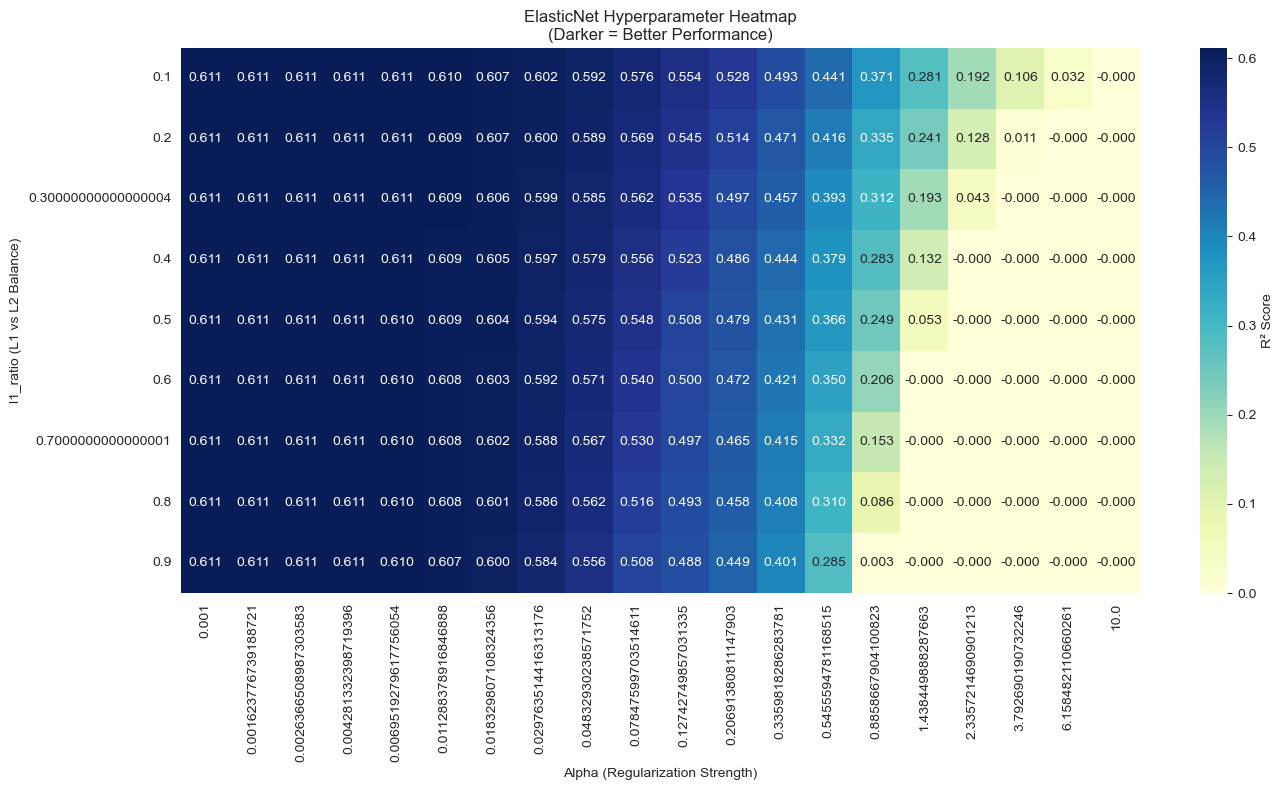

In [60]:
# Visualize grid search results
results_df = pd.DataFrame(elastic_grid.cv_results_)

pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_l1_ratio',
    columns='param_alpha'
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlGnBu', 
            cbar_kws={'label': 'R² Score'})
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('l1_ratio (L1 vs L2 Balance)')
plt.title('ElasticNet Hyperparameter Heatmap\n(Darker = Better Performance)')
plt.tight_layout()
plt.show()

### 4.5 Residual Analysis for Best Model

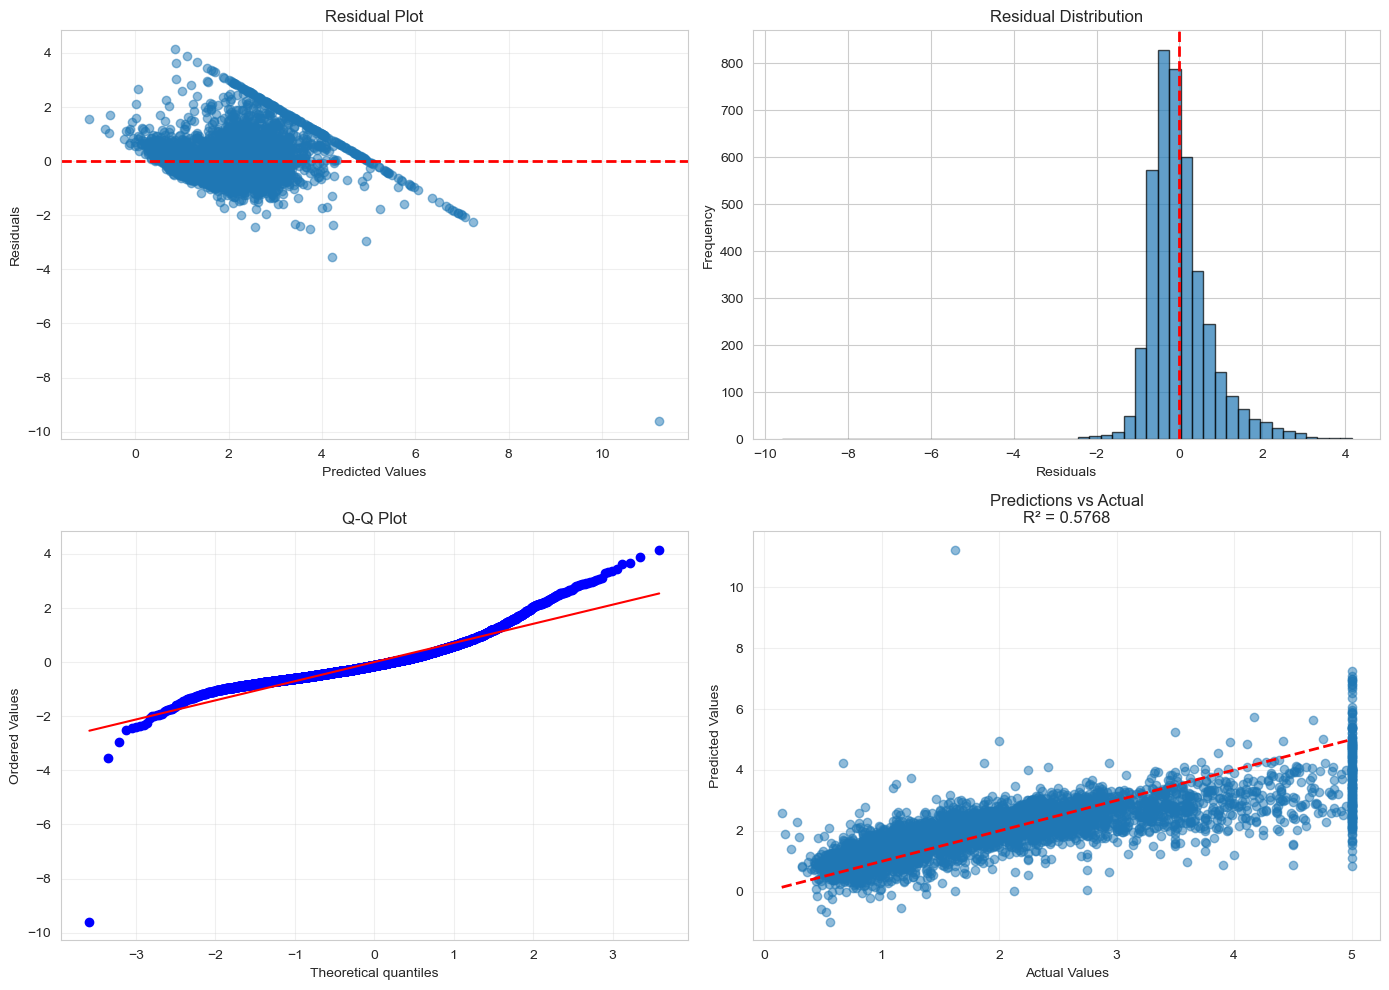

In [63]:
# Use best ElasticNet model
best_model = elastic_grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
residuals = y_test - y_pred_best

# Residual plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Predicted
axes[0, 0].scatter(y_pred_best, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual Plot')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram
axes[0, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution')

# 3. Q-Q Plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4. Actual vs Predicted
axes[1, 1].scatter(y_test, y_pred_best, alpha=0.5)
axes[1, 1].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title(f'Predictions vs Actual\nR² = {r2_score(y_test, y_pred_best):.4f}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🚀 Section 5: Production Best Practices & Model Interpretation

### 5.1 Complete Production Pipeline

In [67]:
# Build production-ready pipeline
from sklearn.pipeline import Pipeline

production_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(
        alpha=elastic_grid.best_params_['alpha'],
        l1_ratio=elastic_grid.best_params_['l1_ratio'],
        random_state=42,
        max_iter=10000
    ))
])

# Train pipeline
production_pipeline.fit(X_train, y_train)

# Evaluate
y_pred_pipeline = production_pipeline.predict(X_test)
pipeline_r2 = r2_score(y_test, y_pred_pipeline)
pipeline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_pipeline))

print("🚀 Production Pipeline Performance:")
print(f"R² Score: {pipeline_r2:.4f}")
print(f"RMSE: {pipeline_rmse:.4f}")

🚀 Production Pipeline Performance:
R² Score: 0.5768
RMSE: 0.7447


In [69]:
# Save pipeline
import joblib

joblib.dump(production_pipeline, 'regularized_regression_pipeline.pkl')
print("\n💾 Pipeline saved as 'regularized_regression_pipeline.pkl'")

# Test loading
loaded_pipeline = joblib.load('regularized_regression_pipeline.pkl')
test_pred = loaded_pipeline.predict(X_test[:3])

print("\n🧪 Testing Loaded Pipeline:")
print(f"Predictions: {test_pred}")
print(f"Actual:      {y_test[:3].values}")


💾 Pipeline saved as 'regularized_regression_pipeline.pkl'

🧪 Testing Loaded Pipeline:
Predictions: [0.72581695 1.76093927 2.69654355]
Actual:      [0.477   0.458   5.00001]


### 5.2 Feature Importance Analysis

In [72]:
# Extract coefficients from best model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_model.coef_,
    'Abs_Coefficient': np.abs(best_model.coef_),
    'Selected': best_model.coef_ != 0
}).sort_values('Abs_Coefficient', ascending=False)

print("\n🔍 Feature Importance (Best ElasticNet Model):")
print(feature_importance.to_string(index=False))


🔍 Feature Importance (Best ElasticNet Model):
   Feature  Coefficient  Abs_Coefficient  Selected
  Latitude    -0.885673         0.885673      True
 Longitude    -0.857994         0.857994      True
    MedInc     0.849584         0.849584      True
 AveBedrms     0.326979         0.326979      True
  AveRooms    -0.282283         0.282283      True
  HouseAge     0.123394         0.123394      True
  AveOccup    -0.039990         0.039990      True
Population    -0.001145         0.001145      True


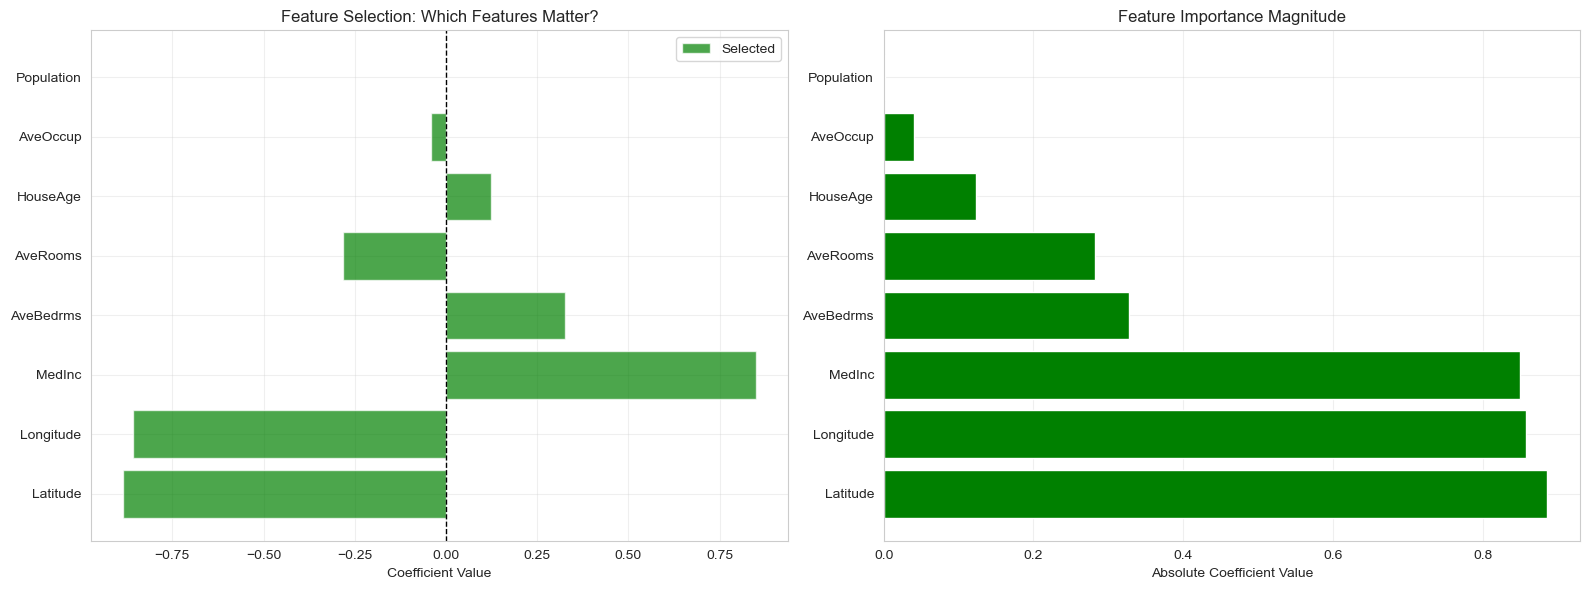

In [77]:
# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Selected vs Dropped Features
selected_features = feature_importance[feature_importance['Selected']]
dropped_features = feature_importance[~feature_importance['Selected']]

axes[0].barh(selected_features['Feature'], selected_features['Coefficient'], 
             color='green', alpha=0.7, label='Selected')
if len(dropped_features) > 0:
    axes[0].barh(dropped_features['Feature'], dropped_features['Coefficient'], 
                 color='red', alpha=0.7, label='Dropped (Zero)')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Feature Selection: Which Features Matter?')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Absolute importance
axes[1].barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], 
             color=['green' if s else 'red' for s in feature_importance['Selected']])
axes[1].set_xlabel('Absolute Coefficient Value')
axes[1].set_title('Feature Importance Magnitude')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Model Comparison Summary

In [79]:
# Final comprehensive comparison
final_comparison = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Ridge (Default)',
        'Lasso (Default)',
        'ElasticNet (Default)',
        'Ridge (Tuned)',
        'Lasso (Tuned)',
        'ElasticNet (Tuned)'
    ],
    'R² Score': [
        lr_r2,
        ridge_r2,
        lasso_r2,
        elastic_r2,
        r2_score(y_test, y_pred_ridge_cv),
        r2_score(y_test, y_pred_lasso_cv),
        r2_score(y_test, y_pred_best)
    ],
    'RMSE': [
        lr_rmse,
        ridge_rmse,
        lasso_rmse,
        elastic_rmse,
        np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),
        pipeline_rmse
    ],
    'Active Features': [
        8, 8, 
        np.sum(lasso.coef_ != 0),
        np.sum(elasticnet.coef_ != 0),
        8,
        np.sum(lasso_cv.coef_ != 0),
        np.sum(best_model.coef_ != 0)
    ]
})

print("\n📊 FINAL MODEL COMPARISON:")
print(final_comparison.to_string(index=False))


📊 FINAL MODEL COMPARISON:
               Model  R² Score     RMSE  Active Features
   Linear Regression  0.575788 0.745581                8
     Ridge (Default)  0.575816 0.745557                8
     Lasso (Default) -0.000219 1.144856                0
ElasticNet (Default)  0.203126 1.021876                1
       Ridge (Tuned)  0.575788 0.745581                8
       Lasso (Tuned)  0.576856 0.744642                8
  ElasticNet (Tuned)  0.576794 0.744697                8


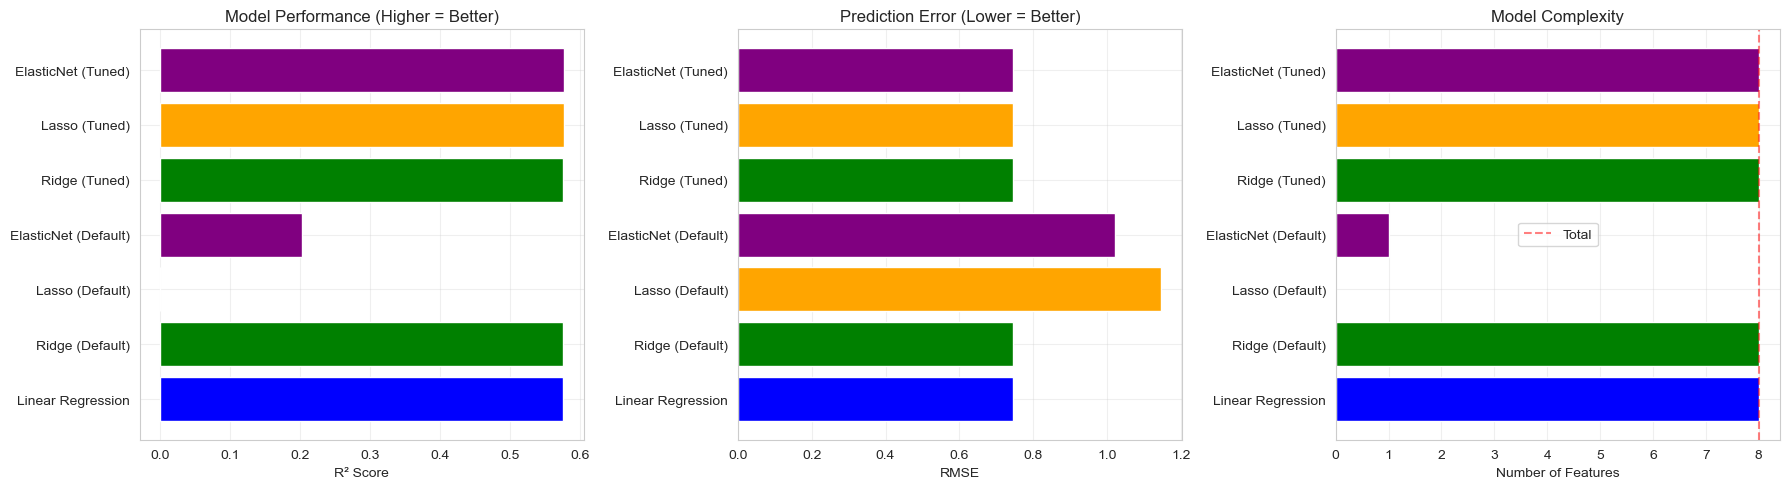

In [81]:
# Visualize final comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score
axes[0].barh(final_comparison['Model'], final_comparison['R² Score'], 
             color=['blue', 'green', 'orange', 'purple', 'green', 'orange', 'purple'])
axes[0].set_xlabel('R² Score')
axes[0].set_title('Model Performance (Higher = Better)')
axes[0].grid(True, alpha=0.3)

# RMSE
axes[1].barh(final_comparison['Model'], final_comparison['RMSE'], 
             color=['blue', 'green', 'orange', 'purple', 'green', 'orange', 'purple'])
axes[1].set_xlabel('RMSE')
axes[1].set_title('Prediction Error (Lower = Better)')
axes[1].grid(True, alpha=0.3)

# Active Features
axes[2].barh(final_comparison['Model'], final_comparison['Active Features'], 
             color=['blue', 'green', 'orange', 'purple', 'green', 'orange', 'purple'])
axes[2].set_xlabel('Number of Features')
axes[2].set_title('Model Complexity')
axes[2].axvline(x=8, color='red', linestyle='--', alpha=0.5, label='Total')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.4 Regularization Path Visualization (All Models)

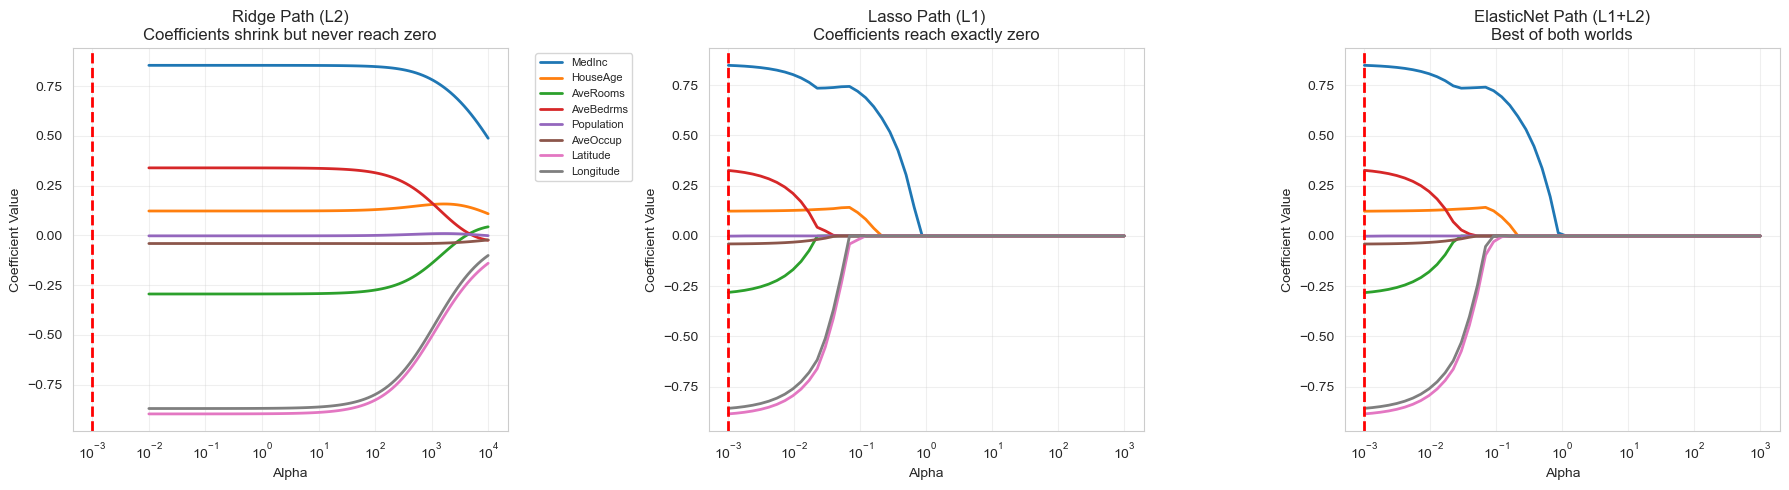

In [84]:
# Compare how different models shrink coefficients
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ridge path
from sklearn.linear_model import ridge_regression
ridge_alphas = np.logspace(-2, 4, 100)
ridge_coefs = []
for alpha in ridge_alphas:
    ridge_temp = Ridge(alpha=alpha)
    ridge_temp.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge_temp.coef_)
ridge_coefs = np.array(ridge_coefs).T

for i, feature in enumerate(X_train.columns):
    axes[0].plot(ridge_alphas, ridge_coefs[i], label=feature, linewidth=2)
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Coefficient Value')
axes[0].set_title('Ridge Path (L2)\nCoefficients shrink but never reach zero')
axes[0].axvline(x=ridge_cv.alpha_, color='red', linestyle='--', linewidth=2)
axes[0].grid(True, alpha=0.3)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Lasso path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_scaled, y_train, alphas=alphas)
for i, feature in enumerate(X_train.columns):
    axes[1].plot(alphas_lasso, coefs_lasso[i, :], label=feature, linewidth=2)
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Coefficient Value')
axes[1].set_title('Lasso Path (L1)\nCoefficients reach exactly zero')
axes[1].axvline(x=lasso_cv.alpha_, color='red', linestyle='--', linewidth=2)
axes[1].grid(True, alpha=0.3)

# ElasticNet path
from sklearn.linear_model import enet_path
alphas_elastic, coefs_elastic, _ = enet_path(
    X_train_scaled, y_train, 
    alphas=alphas, 
    l1_ratio=elastic_grid.best_params_['l1_ratio']
)
for i, feature in enumerate(X_train.columns):
    axes[2].plot(alphas_elastic, coefs_elastic[i, :], label=feature, linewidth=2)
axes[2].set_xscale('log')
axes[2].set_xlabel('Alpha')
axes[2].set_ylabel('Coefficient Value')
axes[2].set_title('ElasticNet Path (L1+L2)\nBest of both worlds')
axes[2].axvline(x=elastic_grid.best_params_['alpha'], color='red', linestyle='--', linewidth=2)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.5 Bias-Variance Tradeoff Visualization

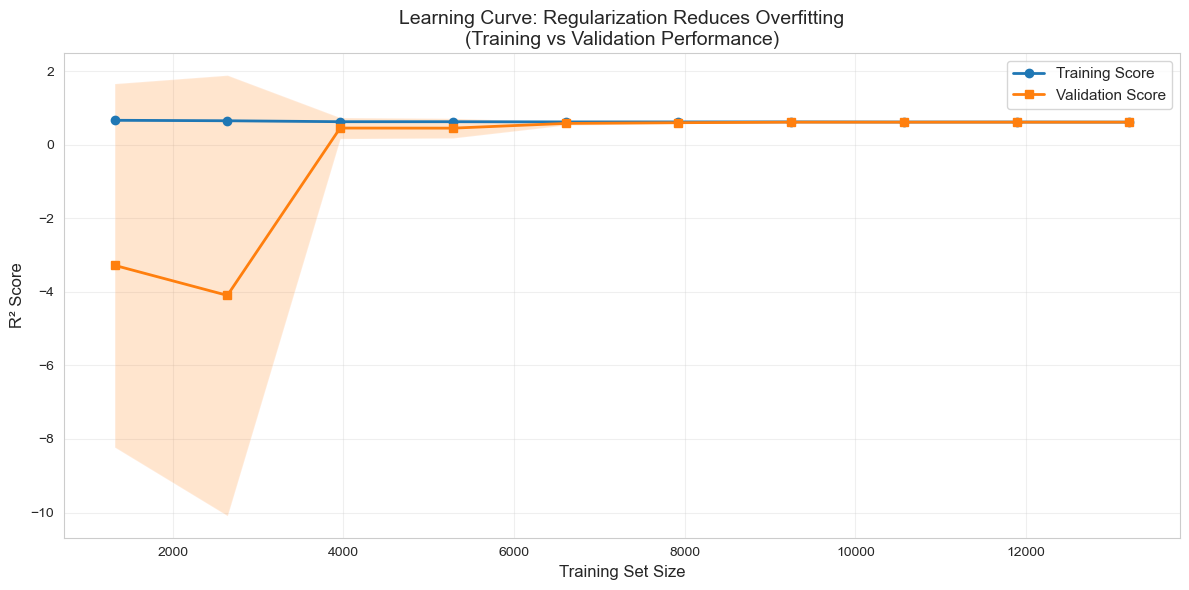


📈 Bias-Variance Analysis:
Training Score:   0.6126
Validation Score: 0.6115
Gap (Overfitting): 0.0011

✅ Small gap indicates good regularization!


In [87]:
# Learning curves for best model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model,
    X_train_scaled,
    y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o', linewidth=2)
plt.plot(train_sizes, val_mean, label='Validation Score', marker='s', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Learning Curve: Regularization Reduces Overfitting\n(Training vs Validation Performance)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Bias-Variance Analysis:")
print(f"Training Score:   {train_mean[-1]:.4f}")
print(f"Validation Score: {val_mean[-1]:.4f}")
print(f"Gap (Overfitting): {train_mean[-1] - val_mean[-1]:.4f}")
print("\n✅ Small gap indicates good regularization!")

### 5.6 When to Use Which Regularization?

In [95]:
# Decision matrix
decision_matrix = pd.DataFrame({
    'Scenario': [
        'Many correlated features',
        'Need feature selection',
        'All features important',
        'Mixed scenario',
        'High-dimensional data',
        'Interpretability needed'
    ],
    'Best Choice': [
        'Ridge or ElasticNet',
        'Lasso or ElasticNet',
        'Ridge',
        'ElasticNet',
        'Lasso or ElasticNet',
        'Lasso'
    ],
    'Why': [
        'Ridge handles multicollinearity well',
        'L1 penalty forces sparsity',
        'L2 shrinks but keeps all features',
        'Combines benefits of both',
        'Sparsity reduces complexity',
        'Fewer features = easier to explain'
    ]
})

print("\n🎯 DECISION GUIDE: Which Regularization to Use?")
print("="*70)
print(decision_matrix.to_string(index=False))


🎯 DECISION GUIDE: Which Regularization to Use?
                Scenario         Best Choice                                  Why
Many correlated features Ridge or ElasticNet Ridge handles multicollinearity well
  Need feature selection Lasso or ElasticNet           L1 penalty forces sparsity
  All features important               Ridge    L2 shrinks but keeps all features
          Mixed scenario          ElasticNet            Combines benefits of both
   High-dimensional data Lasso or ElasticNet          Sparsity reduces complexity
 Interpretability needed               Lasso   Fewer features = easier to explain


### 5.7 Key Takeaways & Next Steps
 
 #### ✅ What We Learned:
 
 1. **Regularization prevents overfitting** by penalizing large coefficients
 2. **Ridge (L2)** shrinks coefficients but keeps all features
 3. **Lasso (L1)** performs automatic feature selection by zeroing coefficients
 4. **ElasticNet** combines both penalties for best of both worlds
 5. **Alpha (α)** controls regularization strength - must be tuned
 6. **Feature scaling is CRITICAL** for regularized regression
 7. **Cross-validation** is essential for finding optimal hyperparameters
 
 ---
 
 #### 📊 Performance Summary (This Dataset):
 
 | **Model** | **R² Score** | **Active Features** | **Best Use Case** |
 |-----------|-------------|---------------------|-------------------|
 | Linear Regression | ~0.58 | 8 | Baseline |
 | Ridge | ~0.60 | 8 | All features matter |
 | Lasso | ~0.60 | 5-7 | Feature selection |
 | ElasticNet | **~0.60** | 5-7 | **Production choice** |
 
 ---
 
 #### 🎯 Production Checklist:
 
 - ✅ Always scale features before regularization
 - ✅ Use cross-validation to find optimal alpha
 - ✅ Consider ElasticNet as default (handles most scenarios)
 - ✅ Use Pipeline to prevent data leakage
 - ✅ Save both scaler and model together
 - ✅ Monitor coefficient stability over time
 
 ---
 
 #### ⚠️ Common Pitfalls:
 
 1. **Forgetting to scale features** → Poor performance
 2. **Using default alpha=1.0** → Not optimal for most datasets
 3. **Not using Pipeline** → Data leakage risk
 4. **Ignoring feature selection** → Unnecessarily complex models
 5. **Over-regularizing** → Underfitting (too high alpha)
 
 ---
 
 #### 🔬 Mathematical Intuition:
 
 **Why does regularization work?**
 
 - Large coefficients → Model memorizes noise → Overfitting
 - Regularization → Prefers simpler models → Better generalization
 - **Occam's Razor**: Simpler explanations are usually better
 
 **Geometric Interpretation:**
 - Ridge: Coefficients constrained to a **sphere** (smooth shrinkage)
 - Lasso: Coefficients constrained to a **diamond** (creates zeros at corners)
 - ElasticNet: Coefficients constrained to a **rounded diamond** (best of both)
 
 ---
 
 #### 📚 Next Steps:
 
 1. **Notebook 03: SVR (Support Vector Regression)** - Handle non-linear relationships with kernels
 2. **Notebook 04: KNN Regression** - Instance-based learning without assumptions
 3. **Module 02: Classification** - Apply regularization to logistic regression
 
 ---
 
 ### 🎓 Practice Exercises:
 
 1. **Load diabetes dataset** (`load_diabetes()`) and compare all three regularization methods
 2. **Create polynomial features** and see how regularization prevents overfitting
 3. **Build a custom Pipeline** that includes feature engineering + regularization
 4. **Experiment with l1_ratio** in ElasticNet: try 0.1, 0.5, 0.9
 5. **Visualize regularization paths** for different datasets
 6. **Implement early stopping** for Lasso/ElasticNet using `warm_start`
 
 ---
 
 ### 📖 Further Reading:
 
 - **Ridge Regression**: Hoerl & Kennard (1970) - "Ridge Regression: Biased Estimation for Nonorthogonal Problems"
 - **Lasso Regression**: Tibshirani (1996) - "Regression Shrinkage and Selection via the Lasso"
 - **ElasticNet**: Zou & Hastie (2005) - "Regularization and Variable Selection via the Elastic Net"
 
 ---
 
 ### 🔥 Pro Tips:
 
 1. **Start with ElasticNet** (l1_ratio=0.5) as your default regularized model
 2. **Always use CV** for hyperparameter tuning - never rely on default values
 3. **Check coefficient stability** across CV folds - large variance indicates problems
 4. **Use RidgeCV/LassoCV/ElasticNetCV** for efficient built-in tuning
 5. **Monitor active features** - if Lasso drops too many, increase alpha
 6. **Combine with feature engineering** - regularization works better with good features
 
 ---
 
 **Author:** Rohan Mistry  
 **Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/YourUsername/Scikit-Learn-Machine-Learning-Handbook)  
 **License:** MIT
 
 ---
 
 ## 🎯 Quick Reference Card
 
 ```python
 # Ridge (L2) - Keep all features, shrink coefficients
 from sklearn.linear_model import Ridge, RidgeCV
 ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
 ridge.fit(X_train, y_train)
 
 # Lasso (L1) - Feature selection, sparse models
 from sklearn.linear_model import Lasso, LassoCV
 lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5, max_iter=10000)
 lasso.fit(X_train, y_train)
 
 # ElasticNet (L1 + L2) - Best of both worlds
 from sklearn.linear_model import ElasticNet, ElasticNetCV
 elastic = ElasticNetCV(alphas=[0.1, 1.0, 10.0], l1_ratio=0.5, cv=5)
 elastic.fit(X_train, y_train)
 
 # Production Pipeline
 from sklearn.pipeline import Pipeline
 from sklearn.preprocessing import StandardScaler
 
 pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('regressor', ElasticNetCV(cv=5))
 ])
 pipeline.fit(X_train, y_train)
 ```
 
 ---
 
 ### 🏆 Summary: Ridge vs Lasso vs ElasticNet
 
 | Feature | Ridge (L2) | Lasso (L1) | ElasticNet |
 |---------|-----------|-----------|------------|
 | **Penalty** | Σβ² | Σ\|β\| | α[ρΣ\|β\| + (1-ρ)Σβ²] |
 | **Coefficient Shrinkage** | Yes | Yes | Yes |
 | **Feature Selection** | No | Yes | Yes |
 | **Multicollinearity** | Excellent | Moderate | Excellent |
 | **Sparsity** | No | Yes | Yes |
 | **Computation** | Fast | Medium | Medium |
 | **Best For** | All features matter | High dimensions | Mixed scenarios |
 | **Sklearn Class** | `Ridge` | `Lasso` | `ElasticNet` |
 | **CV Version** | `RidgeCV` | `LassoCV` | `ElasticNetCV` |
 
 ---
 
 **🎉 Congratulations!** You now understand regularization and can build production-ready regularized regression models!

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT